# <font color="Yellow"><b>ST590 Project 1</b></font>
## <font color="Green">Sergio Mora & Vivi Feathers</font>

# <font color="red"><b>Introduction</b></font>
<font color="green">Purples:</font> Predict a value of <i>selling_price</i> for a new motorcycle.

<font color="green">Dataset name:</font> <b>BikeDetails</b> <br>
This dataset contains information about used motorcycles, including their features and selling prices.

<font color="green">Variables used:</font> <i>selling_price</i>, <i>km_driven</i>
<style>
        .tab1 {
            tab-size: 2;
        }
    </style>
<font color="green">Methods:</font><br>
<pre class="tab1">1. Grid search</pre>
<pre class="tab1">2. Gradient descent</pre>
        
<font color="green">Algorithms:</font><br>
<pre class="tab1">1. Using only <i>selling_price</i> to predict c</pre>
<pre class="tab1">2. Using simple linear regression with <i>selling_price</i> and <i>km_driven</i> to predict c</pre>
 
<font color="green">Modules:</font><br>
<pre class="tab1">1. pandas</pre>
<pre class="tab1">2. numpy</pre>
<pre class="tab1">3. matplotlib.pyplot</pre>
<pre class="tab1">4. scipy.stats</pre>
<pre class="tab1">5. sklearn.linear_model</pre>
<pre class="tab1">6. random</pre>

 ## <font color="red">Read in dataset and display the first several rows</font>

In [1]:
### Import modules
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import random as rd

In [2]:
### Reading the data
bikeDetails = pd.read_csv("bikeDetails.csv")

In [3]:
### Data structure and first several rows
a=bikeDetails.shape
print(a)
bikeDetails.head()

(1061, 7)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


# <font color="red"><b>EDA</b></font>
## <font color="Green"><i>selling_price</i></font>

In [4]:
### General information
bikeDetails["selling_price"].describe(percentiles=[0.25, 0.75])

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64

In [5]:
# Check normality #
import scipy.stats as stat
stat, p = stat.shapiro(bikeDetails["selling_price"])
print(p)
# not normally distributed, use median and IQR #
median_price = bikeDetails["selling_price"].median()
q1_price = bikeDetails["selling_price"].quantile(q = [0.25])
q3_price = bikeDetails["selling_price"].quantile(q = [0.75])
IQR_price = q3_price[0.75] - q1_price[0.25]
print("The meidian of selling_price is", median_price)
print("The first quartile of selling_price is", q1_price)
print("The third quartile of selling_price is", q3_price)
print("The IQR of selling_price is", IQR_price)

2.972154042832937e-42
The meidian of selling_price is 45000.0
The first quartile of selling_price is 0.25    28000.0
Name: selling_price, dtype: float64
The third quartile of selling_price is 0.75    70000.0
Name: selling_price, dtype: float64
The IQR of selling_price is 42000.0


In [6]:
### Median, Q1 and Q3 of selling_price in different seller_type groups
bikeDetails.seller_type = bikeDetails.seller_type.astype("category")
bike_sub = bikeDetails.loc[:,["seller_type","selling_price"]]
price_group_median=bike_sub.groupby("seller_type").median()
print(price_group_median)
price_group_q1=bike_sub.groupby("seller_type").quantile(q = [0.25])
print(price_group_q1)
price_group_q3=bike_sub.groupby("seller_type").quantile(q = [0.25])
print(price_group_q3)

             selling_price
seller_type               
Dealer             44000.0
Individual         45000.0
                  selling_price
seller_type                    
Dealer      0.25        28250.0
Individual  0.25        28000.0
                  selling_price
seller_type                    
Dealer      0.25        28250.0
Individual  0.25        28000.0


## <font color="Green"><i>km_driven</i></font>

In [7]:
### General information
bikeDetails["km_driven"].describe(percentiles=[0.25, 0.75])

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [8]:
# Check normality #
import scipy.stats as stat
stat, p = stat.shapiro(bikeDetails["km_driven"])
print(p)
# not normally distributed, use median and IQR #
median_km = bikeDetails["km_driven"].median()
q1_km = bikeDetails["km_driven"].quantile(q = [0.25])
q3_km = bikeDetails["km_driven"].quantile(q = [0.75])
IQR_km = q3_km[0.75] - q1_km[0.25]
print("The meidian of km_driven is", median_km)
print("The first quartile of km_driven is", q1_km)
print("The third quartile of km_driven is", q3_km)
print("The IQR of km_driven is", IQR_km)

0.0
The meidian of km_driven is 25000.0
The first quartile of km_driven is 0.25    13500.0
Name: km_driven, dtype: float64
The third quartile of km_driven is 0.75    43000.0
Name: km_driven, dtype: float64
The IQR of km_driven is 29500.0


## <font color="red">Correlation between</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

In [9]:
### Correlation Matrix
bikeDetails[["selling_price", "km_driven"]].corr(method='pearson')

,selling_price,km_driven
selling_price,1.000000,-0.212937
km_driven,-0.212937,1.000000


In [10]:
### Pearson correlation
import scipy.stats as stat
stat.pearsonr(bikeDetails.selling_price, bikeDetails.km_driven)
### the P value is smaller than 0.05, and the correlation coefficient is -0.2129, significate negative correlation.

(-0.2129367071445366, 2.411679611918878e-12)

## <font color="red">Linear Regression Model of</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

In [11]:
x=bikeDetails.km_driven.values.reshape(-1, 1)
y=bikeDetails.selling_price.values.reshape(-1, 1)
#print(x)
#print(y)
model = LinearRegression().fit(x, y)
print("b0 = ", model.intercept_, "\nb1 = ", model.coef_)

b0 =  [67618.07212024] 
b1 =  [[-0.23224561]]


## <font color="red">Subset the data for 100 times and get 100 Linear Regression Models of</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font><font color="red">, return b0 and b1 lists</font>

In [12]:
b0 = []
b1 = []
for i in range (0, 100):
    x = bikeDetails.km_driven.sample(n=100).values.reshape(-1, 1)
    y = bikeDetails.selling_price.sample(n=100).values.reshape(-1, 1)
    #print(x)
    #print(y)
    model = LinearRegression().fit(x, y)
    b0_now = model.intercept_.tolist()
    b1_now = model.coef_.tolist()
    b0.append(b0_now)
    b1.append(b1_now)
print("list of b0 values: ",b0)
print(" ")
print(" ")
print("list of b0 values: ",b1)


list of b0 values:  [[59662.02758206749], [69195.69721129481], [66695.32367225776], [68614.86461326602], [67288.39861165146], [51565.76080510489], [76380.49346203012], [49258.27220959715], [62502.195204782576], [50153.69809813239], [71169.53003217332], [67027.2157933954], [55739.74024297827], [61134.213727863884], [59749.56581690724], [78018.21956209879], [46441.695283950365], [68505.6507327661], [61686.031903365154], [52696.879154573246], [60587.69576802571], [49744.44464583941], [56437.80128380519], [62530.13109876917], [68310.07601675426], [64276.57965730336], [54383.16535901601], [63999.59612726032], [70933.50870979349], [55684.70822139292], [56481.92075979243], [63419.165733666945], [81145.77460223771], [67435.12571734993], [54583.421753628696], [58910.680798159745], [44829.69001032406], [64540.85590973305], [60283.006659254555], [60329.42243966124], [62067.909320432875], [60429.81266747786], [54437.89179212964], [59314.77863756325], [61972.841433163965], [54751.73869272285], [643

## <font color="red">Plots of</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

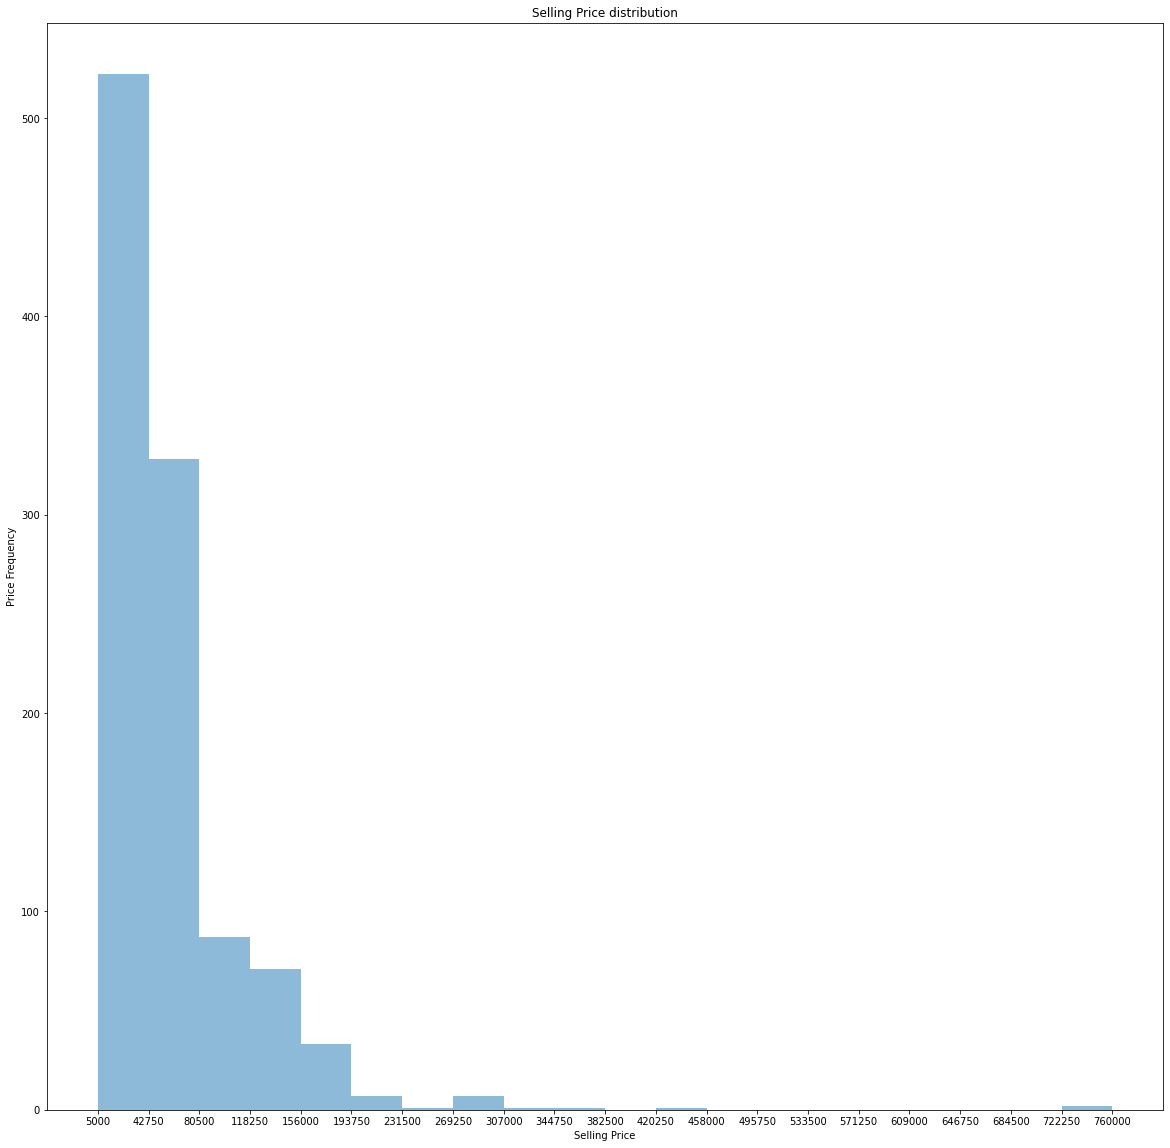

In [13]:
### Histogram for selling_price
fig, ax = plt.subplots(figsize=(20,20))
n, bins, patches=plt.hist(bikeDetails["selling_price"], bins=20, alpha = 0.5)
plt.ylabel("Price Frequency")
plt.xlabel("Selling Price")
plt.xticks(bins)
plt.title("Selling Price distribution")
plt.show()
plt.close()

We see a heavily right skewed distribution almost looks like a Poisson distribution for `selling_price`.

{'whiskers': [<matplotlib.lines.Line2D at 0x205d6fad330>,
 'caps': [<matplotlib.lines.Line2D at 0x205d6fad990>,
 'boxes': [<matplotlib.lines.Line2D at 0x205d6fad060>],
 'medians': [<matplotlib.lines.Line2D at 0x205d6fade70>],
 'fliers': [<matplotlib.lines.Line2D at 0x205d6fae140>],
 'means': []}

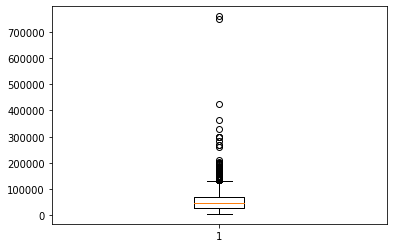

In [14]:
plt.boxplot(bikeDetails.selling_price)

We see that our graph above accounts for extreme and potential outliers in our data. This will make it harder for our model to predict the selling price of a bike since our y variable is so skewed due to so many potential outliers.

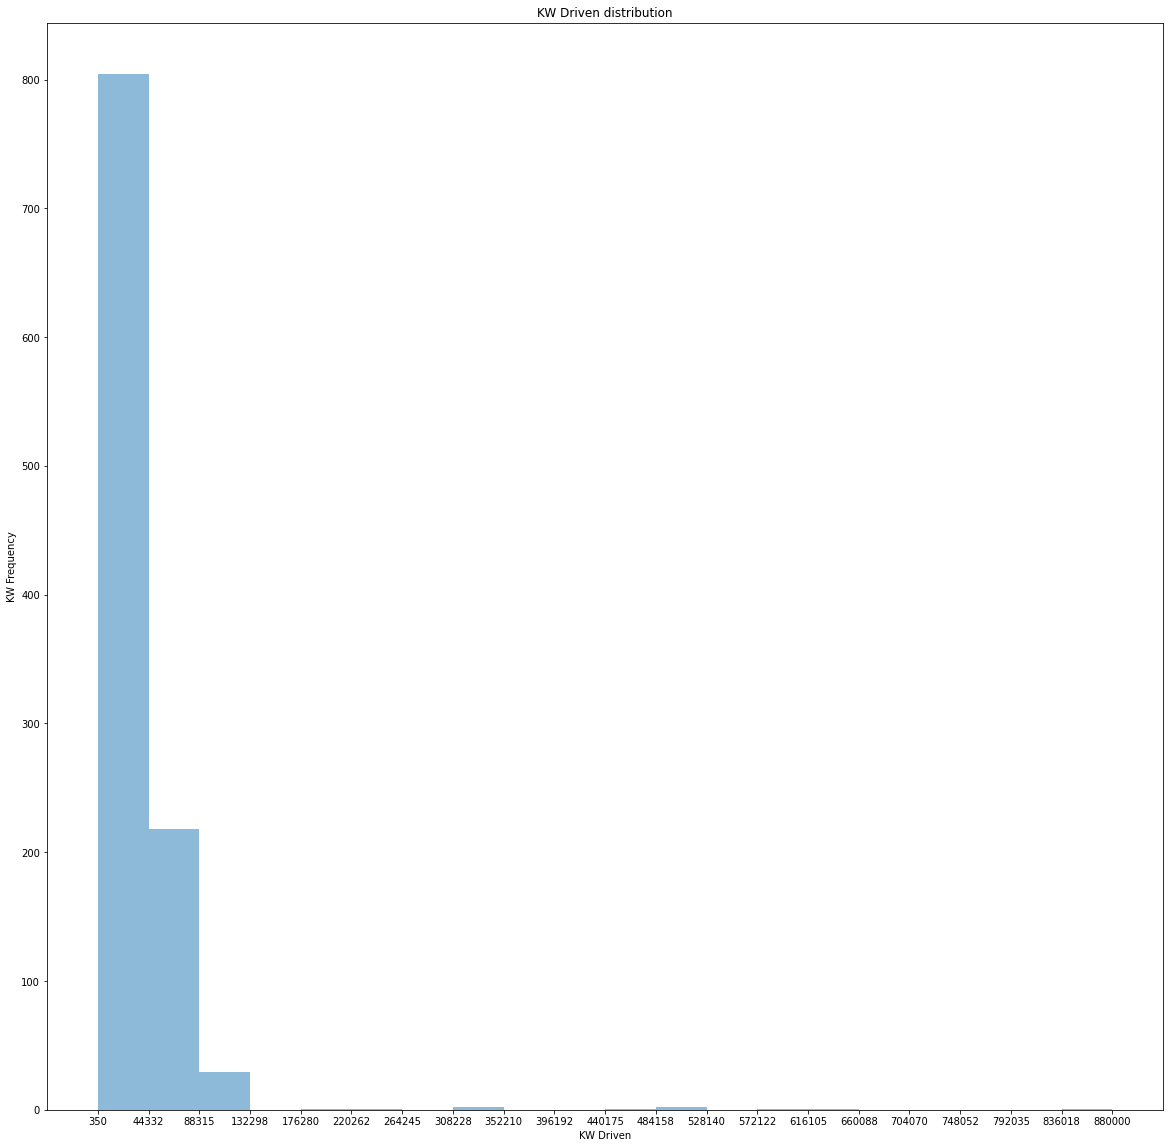

In [15]:
### Histogram for kw_driven
fig, ax = plt.subplots(figsize=(20,20))
n, bins, patches=plt.hist(bikeDetails["km_driven"], bins=20, alpha = 0.5)
plt.ylabel("KW Frequency")
plt.xlabel("KW Driven")
plt.xticks(bins)
plt.title("KW Driven distribution")
plt.show()
plt.close()

Similar to selling price we see a heavily right skewed histogram for `km_driven` meaning we have some extreme values that could be potential outliers. Normally we would want to account for these before building our model.

{'whiskers': [<matplotlib.lines.Line2D at 0x205d6293010>,
 'caps': [<matplotlib.lines.Line2D at 0x205d62935e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x205d6292d40>],
 'medians': [<matplotlib.lines.Line2D at 0x205d6293b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x205d6293e50>],
 'means': []}

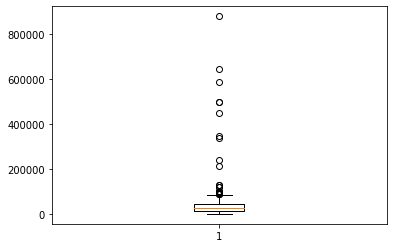

In [16]:
### boxplot of km_driven
plt.boxplot(bikeDetails.km_driven)

We see a lot of outliers in our `Km_driven` variable meaning that it will likely be a sub-par variable in our predictive function.

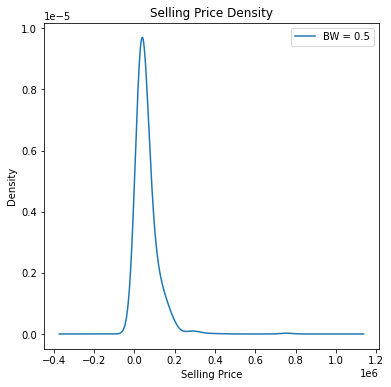

In [17]:
# Kernel density for selling_price #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails["selling_price"].plot.density(bw_method = 0.5, label = "BW = 0.5", ax=ax)
plt.ylabel("Density")
plt.xlabel("Selling Price")
plt.title("Selling Price Density")
plt.legend()
plt.show()
plt.close()

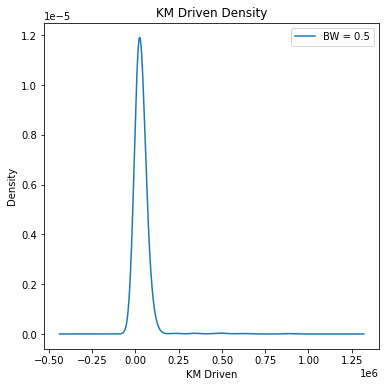

In [18]:
# Kernel density for kw_driven #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails["km_driven"].plot.density(bw_method = 0.5, label = "BW = 0.5", ax=ax)
plt.ylabel("Density")
plt.xlabel("KM Driven")
plt.title("KM Driven Density")
plt.legend()
plt.show()
plt.close()

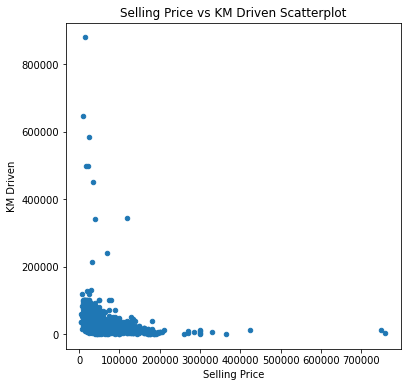

In [19]:
# Selling_price vs KM_Driven Scatterplot #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails.plot.scatter (x= "selling_price", y="km_driven", cmap = "plasma", ax=ax)
plt.xlabel("Selling Price")
plt.ylabel("KM Driven")
plt.title("Selling Price vs KM Driven Scatterplot")
plt.show()
plt.close()

Comparing the selling price and the kilometers driven to each other we might expect to see the $b_0$ for our model to be somewhere between 5000 and 20000 since that is where most of our selling price values are concentrated. Our slope ($b_1$) we would expect to be negative but unclear how negative. If the correlation value is an indicator in this case we would suspect a slope around negative 2.

## <font color="red">Contingency Table and Bar Chart of</font> <font color="Green"><i>year</i></font> <font color="red">and</font> <font color="Green"><i>owner</i></font>

In [20]:
### Contingency table
bikeDetails.owner = bikeDetails.owner.astype("category")
bikeDetails.year = bikeDetails.year.astype("category")
bikeDetails.year [0:4]
table = pd.crosstab(bikeDetails.year, bikeDetails.owner)
print(table)

owner  1st owner  2nd owner  3rd owner  4th owner
year                                             
1988           1          0          0          0
1991           1          0          0          0
1993           0          1          0          0
1995           0          0          1          0
1997           2          0          0          0
1998           2          0          1          0
1999           0          1          0          0
2000           4          0          1          1
2001           1          1          0          0
2002           1          2          0          0
2003           1          0          0          0
2004           4          1          0          0
2005          11          3          0          0
2006          17          3          0          0
2007          24          5          0          0
2008          21          5          2          0
2009          21          5          1          1
2010          50         10          0          0


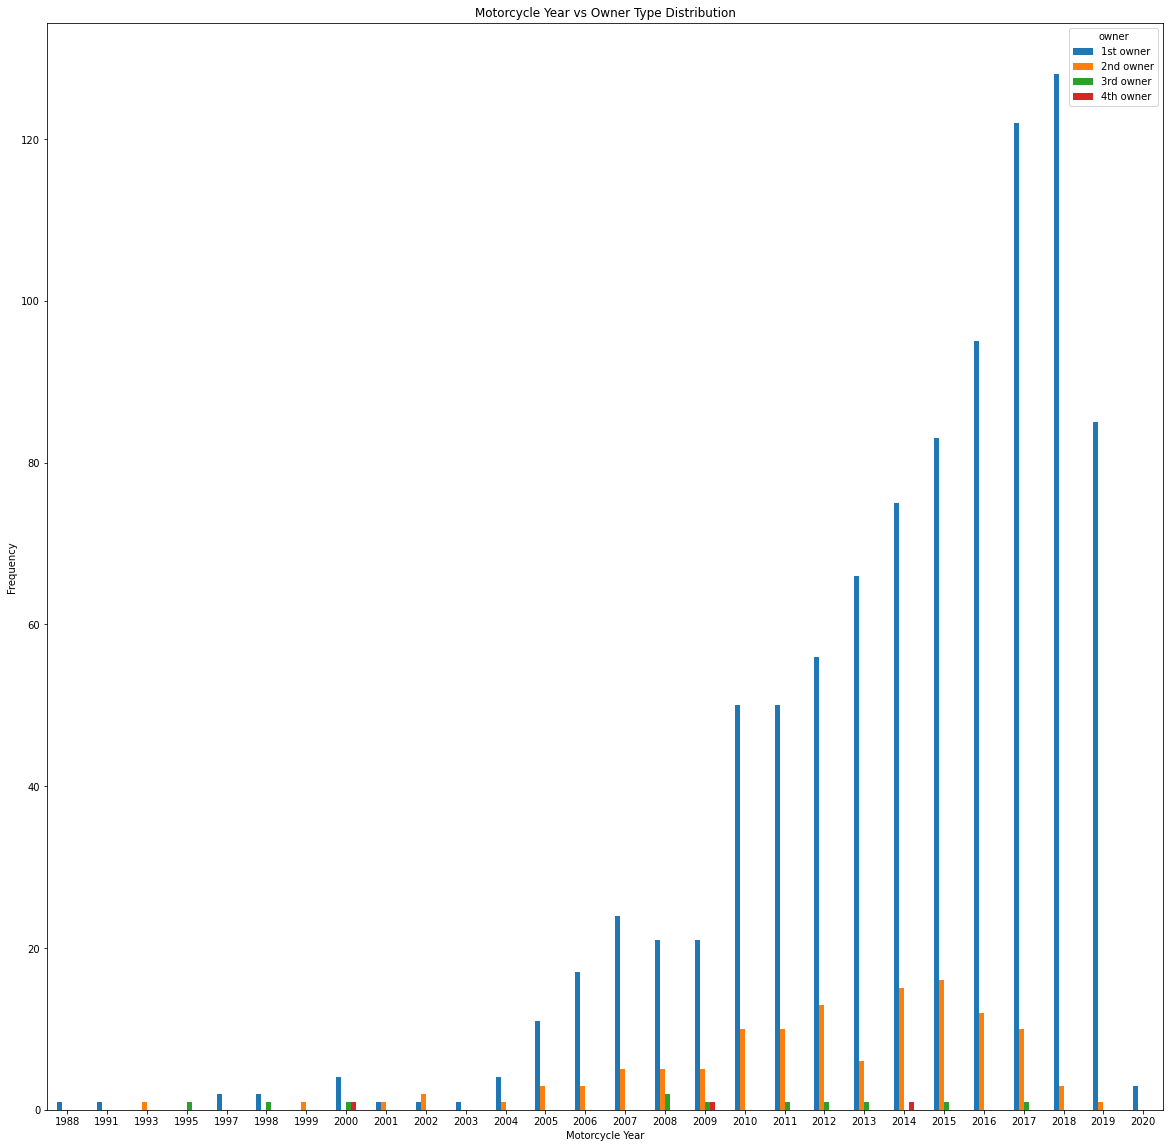

In [21]:
### Bar chart
fig, ax = plt.subplots(figsize=(20,20))
table.plot.bar(ax=ax)
plt.xlabel("Motorcycle Year")
plt.ylabel("Frequency")
plt.title("Motorcycle Year vs Owner Type Distribution")
plt.xticks(rotation = 0)
plt.show()
plt.close()

We see a clear trend showing that we have people who own newer bikes. This makes sense since this data was likely collected around 2019/2020 time frame meaning people are not likely to buy old bikes when they can get newer bikes (assuming newer here means better) for around the same price. The new bike market is overwhelmingly larger than second owned or third own and so on. However we could expect that old bikes can be classics a fetch a hefty price for this reason we would expect some outliers in our data.

# Loss Function

  We start of our analysis with a Loss Function which will help us understand the quality of our methods below. This is done by measuring the Root Mean Square Error (RMSE) which indicates how "off" we were in our model. 
  
  RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^n{L(y_i,c)}} = \sqrt{\frac{1}{n}\sum_{i=1}^n{(y_i - c)^2}}$
  
For this equation to work we want to find the value for c that minimizes the RMSE meaning we have the least amount of "Loss" in our equation.

# <font color="Red"><b>Methods One A</b></font>
## <font color="Green">Grid Search of using just the y′s</font>

In [22]:
### Find a grid of values using selling_price' mean and standard deviation
np.random.seed(123)
grid_c = np.random.normal(59638.151744, 56304.291973, 10000)

In [23]:
### convert grid array to series
grid_c1 = pd.Series(grid_c)
len(grid_c1)

10000

In [24]:
### Create a RMSE Algorithm
def find_best_c(y, x):
    """
    Calculate RMSE from all the c and append them into a list, find the minimal RMSE and return the corresponding c value
    """
    c_rmse = []
    for i in range(0, len(x)):
        rmse = np.sqrt(sum((y - x[i])**2)/len(y))
        c_rmse.append(rmse)
    min_rmse = min(c_rmse)
    min_loc = c_rmse.index(min_rmse)
    optimal_c = x[min_loc]
    return print("The Min RMSE is =", min_rmse,"\nThe min loc is =", min_loc,"\nThe optimal value for c is = ", optimal_c)

We will utilize a grid of selling prices to predict the `selling_price`. We do this by creating a grid of variables that are centered around the distribution of `Selling_price` as seen in the EDA part of our code.  

In [25]:
find_best_c(bikeDetails.selling_price,grid_c1)

The Min RMSE is = 56277.752282119494 
The min loc is = 799 
The optimal value for c is =  59633.89927166418


In [26]:
### Verification, change the float in rmse_test equation to the third number returned by "find_best_c" funtion
price_mean = bikeDetails.selling_price.mean()
rmse_test = np.sqrt(sum((bikeDetails.selling_price -59633.89927166418)**2)/len(bikeDetails.selling_price))
print("The price mean is = ", price_mean,"\nWhile the rmse_test gives us a value of =", rmse_test)
print("The difference seems to be ",(price_mean - 59633.89927166418))

The price mean is =  59638.151743638075 
While the rmse_test gives us a value of = 56277.752282119494
The difference seems to be  4.252471973893989


We see that our model works best when the `selling_price` is around 59K. This makes perfect sense since our `selling_price` variable is centered there. Our lowest RMSE is around 56K meaning we don't have a great model as the standard deviation of our model seems to be fairly large.

## <font color="Green">Run the function using km_driven</font>

In [27]:
### Find a grid of values using km_driven' mean and standard deviation
np.random.seed(123)
grid_ck = np.random.normal(34359.833176, 51623.152702, 100000)

In [28]:
### convert grid array to series
grid_ck1 = pd.Series(grid_ck)
len(grid_ck1)

100000

In [29]:
find_best_c(bikeDetails.km_driven, grid_ck1)

The Min RMSE is = 51598.81937368206 
The min loc is = 19348 
The optimal value for c is =  34359.69373711624


Running our function and iterating it 100,000 times we see that the best value is our 19,348th value with a min RMSE of 51598 from an optimal value of 34,359.

# <font color="Red"><b>Methods One B</b></font>
## <font color="Green">Grid Search of using linear regression model</font>

In [30]:
### Create a RMSE Algorithm accounting for KM_driven 
### Return the b0 b1 pairs that has the minimal RMSE

def find_best_c_with_var(y, x, coeff1, coeff2):
    """
    Calculate RMSE from all the linear regression model and append them into a list, 
    find the minimal RMSE and return the corresponding b0 and b1.
    """
    c_rmse = []
    
    for k in range(0, len(coeff1)):
                y_hat = coeff1[k][0] + coeff2[k][0][0]*x
                rmse = np.sqrt(sum((y - y_hat)**2)/len(y))
                c_rmse.append(rmse)
                
    min_rmse = min(c_rmse)
    min_loc = c_rmse.index(min_rmse)
    optimal_b0 = coeff1[min_loc][0]
    optimal_b1 = coeff2[min_loc][0][0]
    
    
### Use best combination of b0 and b1 to predict the selling_price for km_driven of 10000, 25000, 35000 ###


    selling1 = optimal_b0 + optimal_b1*10000
    selling2 = optimal_b0 + optimal_b1*25000
    selling3 = optimal_b0 + optimal_b1*35000
    return print("The Min RMSE is =", min_rmse,"\nThe optimal b0 is", 
                 optimal_b0, "\nThe optimal b1 is", optimal_b1,\
                "\nThe predicted selling price with km_driven = 10000 is", selling1,\
                "\nThe predicted selling price with km_driven = 25000 is", selling2,\
                "\nThe predicted selling price with km_driven = 35000 is", selling3)

We generated 100 pairs of b0 and b1 in EDA by randomly creating 100 subsets with 100 sample size from the bikeDetail data frame and building 100 regression models.

In [31]:
find_best_c_with_var (bikeDetails.selling_price, bikeDetails.km_driven, b0, b1)

The Min RMSE is = 55070.781098019776 
The optimal b0 is 70933.50870979349 
The optimal b1 is -0.28227289019113955 
The predicted selling price with km_driven = 10000 is 68110.77980788209 
The predicted selling price with km_driven = 25000 is 63876.686455015 
The predicted selling price with km_driven = 35000 is 61053.9575531036


We see that our model works best when b0 = 67901 and b1 = -0.2264 with the RMSE around 55K. It is lower than the RMSE from using only selling_price to generate grid of c, the linear regression model predicts c better.

# <font color="Red"><b>Methods Two A</b></font>
## <font color="Green">Gradient Descent of using just the y′s</font>

In [32]:
### Creat a Gradient Descent Algorithm
def find_best_c_g(var, step_size, starting_point, rounds):
    """
    Pick initial c and initial delta, create new c value based on the slop and step size, 
    loop through untill either the absolute difference between new c and cur c are smaller than 0.08 or reach the maximum iteration 
    """
    cur_c = starting_point
    cur_c_rmse = np.sqrt(sum((var - cur_c)**2)/len(var))
    delta_rmse = np.sqrt(sum((var - (cur_c + 0.005))**2)/len(var))
    slop = (delta_rmse - cur_c_rmse)/0.005
    c = []
    for i in range(0, rounds):
        new_c = cur_c - slop*step_size
        c.append(new_c)
        c_length = len(c) ###see how many iteration
        if abs(new_c - cur_c) >= 0.08:
            new_c_rmse = np.sqrt(sum((var - new_c)**2)/len(var))
            cur_c_rmse = np.sqrt(sum((var - cur_c)**2)/len(var))
            delta = new_c - cur_c
            slop = (new_c_rmse - cur_c_rmse)/delta
            cur_c = new_c
        else:
            cur_c = new_c
            break
    return print ("\nThe optimal value for c is = ", cur_c, "\nIteration Times:", c_length)

In [33]:
find_best_c_g(bikeDetails.selling_price, 0.5, 50000, 100000)


The optimal value for c is =  50516.353900290196 
Iteration Times: 6283


## <font color="Green">Run the function using km_driven</font>

In [34]:
find_best_c_g(bikeDetails.km_driven, 0.5, 25000, 100000)


The optimal value for c is =  25996.43735207931 
Iteration Times: 11786


# <font color="Red"><b>Methods Two B</b></font>
## <font color="Green">Gradient Descent of using linear regression model</font>

In [35]:
### Creat a Gradient Descent Algorithm accounting for KM_driven
def find_best_c_g_var(var1, var2, step_size1, step_size2, starting_point1, starting_point2, rounds):
    """
    Pick initial b0, b1 and their initial delta, create new b0 and b1 value based on the slop and step size, 
    loop through untill either the euclidean distance is smaller than 50 or reach the maximum iteration 
    """
    cur_b0 = starting_point1
    cur_b1 = starting_point2
    
    y_hat = cur_b0 + cur_b1*var1
    cur_b_rmse = np.sqrt(sum((var2 - y_hat)**2)/len(var2))
    
    delta_b0_hat = (cur_b0+0.005) + cur_b1*var1
    delta_b0_rmse = np.sqrt(sum((var2 - delta_b0_hat)**2)/len(var2))
    slop_b0 = (delta_b0_rmse - cur_b_rmse)/0.005
    
    delta_b1_hat = cur_b0 + (cur_b1+0.005)*var1
    delta_b1_rmse = np.sqrt(sum((var2 - delta_b1_hat)**2)/len(var2))
    slop_b1 = (delta_b1_rmse - cur_b_rmse)/0.005
    
    b0_list = []
    b1_list = []
    distance = []
    for i in range(0, rounds):
        new_b0 = cur_b0 - slop_b0*step_size1
        new_b1 = cur_b1 - slop_b1*step_size2
        
        b0_list.append(new_b0)
        b1_list.append(new_b1)
        b_length = len(b0_list) ###see how many iteration
        dis = np.sqrt((cur_b0 - new_b0)**2 + (cur_b1 - new_b1)**2)
        distance.append(dis)
        if dis >= 0.04072:
            y_hat = cur_b0 + cur_b1*var1
            cur_b_rmse = np.sqrt(sum((var2 - y_hat)**2)/len(var2))
            
            delta_b0_hat = new_b0 + cur_b1*var1
            delta_b0_rmse = np.sqrt(sum((var2 - delta_b0_hat)**2)/len(var2))
            delta_b0 = new_b0 - cur_b0
            slop_b0 = (delta_b0_rmse - cur_b_rmse)/delta_b0
            
            delta_b1_hat = cur_b0 + new_b1*var1
            delta_b1_rmse = np.sqrt(sum((var2 - delta_b1_hat)**2)/len(var2))
            delta_b1 = new_b1 - cur_b1
            slop_b1 = (delta_b1_rmse - cur_b_rmse)/delta_b1
            
            cur_b0 = new_b0
            cur_b1 = new_b1
            predict1 = cur_b0 + cur_b1*10000
            predict2 = cur_b0 + cur_b1*25000
            predict3 = cur_b0 + cur_b1*35000         
        else:
            cur_b0 = new_b0
            cur_b1 = new_b1
            predict1 = cur_b0 + cur_b1*10000
            predict2 = cur_b0 + cur_b1*25000
            predict3 = cur_b0 + cur_b1*35000
            break
            
    return print ("\nThe optimal value for b0 is = ", cur_b0, "\nThe optimal value for b1 is = ", cur_b1,
                  "\nIteration Times:", b_length, 
                  "\nThe predicted selling price with km_driven = 10000 is", predict1,
                  "\nThe predicted selling price with km_driven = 25000 is", predict2, 
                  "\nThe predicted selling price with km_driven = 35000 is", predict3)

In [36]:
find_best_c_g_var(bikeDetails.km_driven, bikeDetails.selling_price, 1, 0.000005, 59000, 0, 100000)


The optimal value for b0 is =  64382.285920590126 
The optimal value for b1 is =  -0.20331385438546776 
Iteration Times: 78043 
The predicted selling price with km_driven = 10000 is 62349.14737673545 
The predicted selling price with km_driven = 25000 is 59299.43956095343 
The predicted selling price with km_driven = 35000 is 57266.301017098755


We started with a starting point of 60,000 which only iterated 3 times meaning that we were really close to our desired result. We since changed it to 59,000 to show that the code works as intended jumping from one value to another until it figures our the best starting point. This took 78K iterations but eventually we found the "best" combination of $b_0$ and $b_1$.

## Testing our results with a SLR pulled from stack overflow

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# Testing with a linear regression
x = bikeDetails[["km_driven"]]
y = bikeDetails[["selling_price"]]

In [39]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [40]:
y_pred = regressor.predict(x)
y_pred

array([[67536.78615714],
       [66305.88443014],
       [64831.12481383],
       ...,
       [59489.47580988],
       [55309.05485026],
       [46197.36287757]])

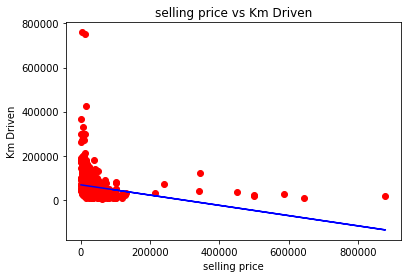

In [41]:
plt.scatter(bikeDetails.km_driven, bikeDetails.selling_price, color = 'red')
plt.plot(bikeDetails.km_driven, y_pred, c = 'blue')
plt.title('selling price vs Km Driven')
plt.xlabel('selling price')
plt.ylabel('Km Driven')
plt.show()

We see that our model isn't too far off from the linear regression both are equally not as good at predicting the price of a bike based on `km_driven` since we have extreme values on both of our variables.

### Conclusion

In Conclusion we see that our grid search is the best model so far with the lowest RMSE value. We also see that it comes closest to a simple linear regression that we ran at the end to measure our results. We that our results aren't too far off from what we see in the SLR function above since our best $b_0$ seems to be around 66,000 `km_driven` which seems to align with the SLR results and has a best $b_1$ result of about -.24 which seems to align with our SLR.


The Gradient Descent seems to not be as good of an estimator based on the higher RMSE and the differing $b_0, b_1$  values of 64,000 `km_driven` and -.20 respectively. 

Although in reality we would likely use the SLR function to analyze our data in the this exercise helps us understand the under the hood working of a SLR. This will help us understand our results better in the future. 